## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('C:/Users/Ani/Desktop/BVNNY/Master/TFM/Datasets/df_final.csv', sep=',')
df.head()

,Especie_planta,Toxic_Yes,Conocimiento_sobre_plantas_enc,Tiempo_de_dedicacion_enc,Clima_No_Seco,Tonos_Cálidos,Tonos_Fríos,Tonos_Me es indiferente,Vivienda_Adosado,Vivienda_Apartamento,Vivienda_Chalet,Dificultad,Ubicación,Estatura,Frecuencia_Riego,Tolera_mediterráneo_seco,Adecuado_para_mascotas,Sensación
0,Costilla de Adán,0.0,1.0,1.0,1,0,1,0,0,0,1,2,0,2,2,0,0,1
1,Costilla de Adán,1.0,1.0,2.0,1,0,1,0,1,0,0,2,0,2,2,0,0,1
2,Costilla de Adán,1.0,1.0,1.0,1,0,0,1,0,1,0,2,0,2,2,0,0,1
3,Costilla de Adán,0.0,1.0,1.0,0,1,0,0,0,1,0,2,0,2,2,0,0,1
4,Costilla de Adán,1.0,1.0,2.0,1,0,0,1,0,0,1,2,0,2,2,0,0,1


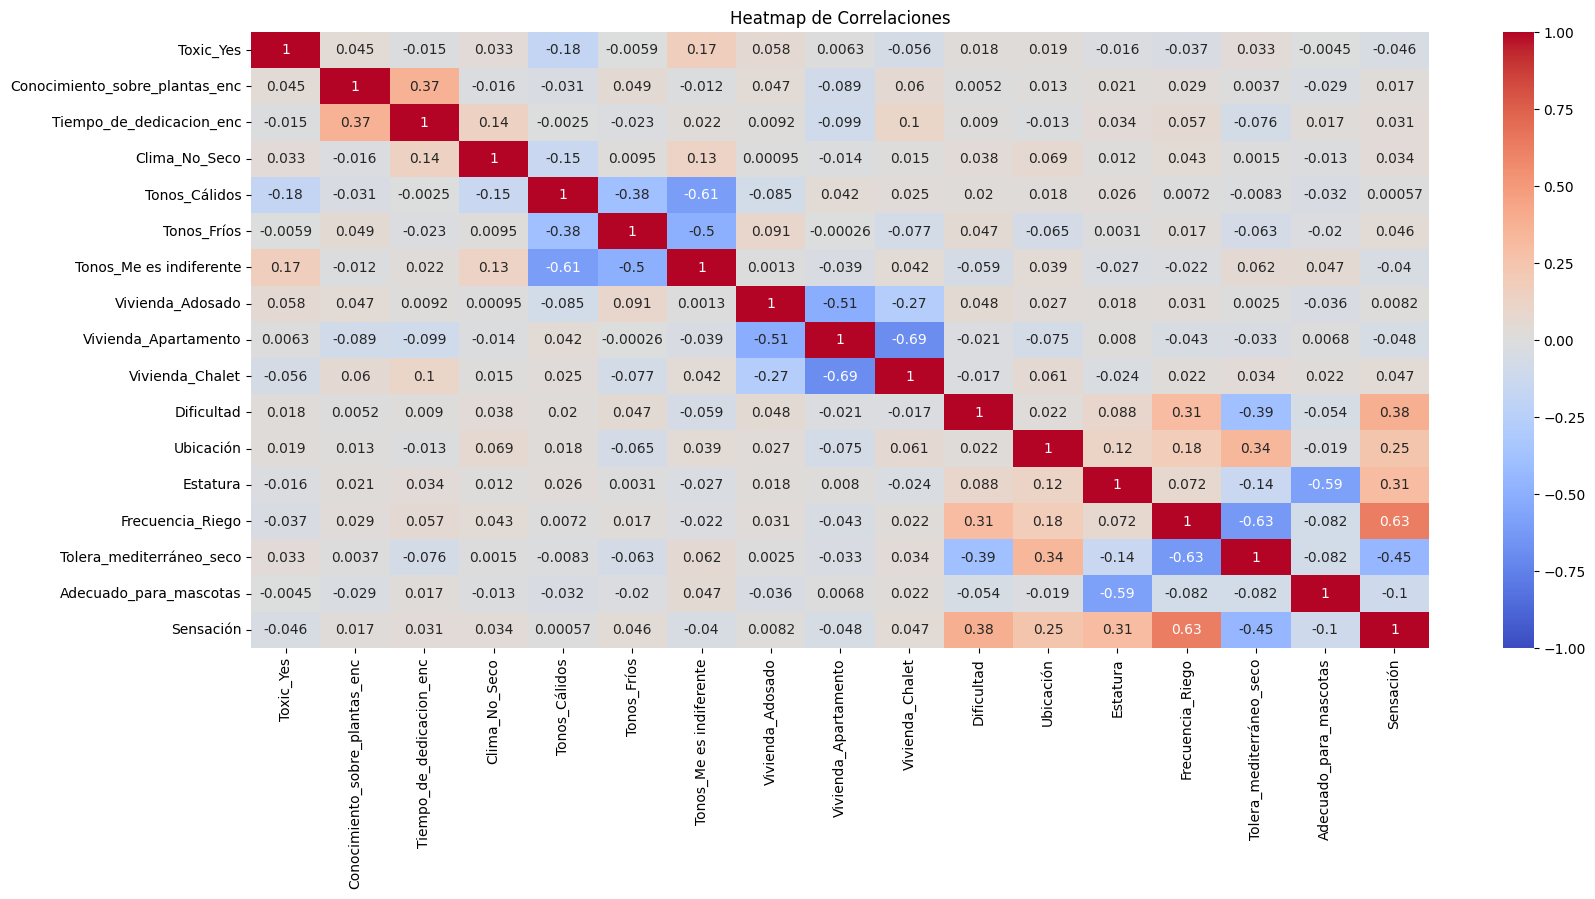

In [3]:
#Heatmap/ mapa de Correlaciones entre Variables Numéricas
numeric_cols = df.select_dtypes(include='number').columns
df_numeric = df[numeric_cols]

# Calcular la matriz de correlación
corr = df_numeric.corr()

# Visualizar el heatmap
plt.figure(figsize=(19, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap de Correlaciones')
plt.show()

In [4]:
df.columns

Index(['Especie_planta', 'Toxic_Yes', 'Conocimiento_sobre_plantas_enc',
       'Tiempo_de_dedicacion_enc', 'Clima_No_Seco', 'Tonos_Cálidos',
       'Tonos_Fríos', 'Tonos_Me es indiferente', 'Vivienda_Adosado',
       'Vivienda_Apartamento', 'Vivienda_Chalet', 'Dificultad', 'Ubicación',
       'Estatura', 'Frecuencia_Riego', 'Tolera_mediterráneo_seco',
       'Adecuado_para_mascotas', 'Sensación'],
      dtype='object')

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Normalizar las columnas numéricas
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()


,Especie_planta,Toxic_Yes,Conocimiento_sobre_plantas_enc,Tiempo_de_dedicacion_enc,Clima_No_Seco,Tonos_Cálidos,Tonos_Fríos,Tonos_Me es indiferente,Vivienda_Adosado,Vivienda_Apartamento,Vivienda_Chalet,Dificultad,Ubicación,Estatura,Frecuencia_Riego,Tolera_mediterráneo_seco,Adecuado_para_mascotas,Sensación
0,Costilla de Adán,-1.124271,-0.245039,-0.783656,0.393978,-0.684291,1.778760,-0.888073,-0.448663,-1.134895,1.646391,1.275451,-0.681859,1.723422,0.711099,-0.980878,-0.821761,0.359607
1,Costilla de Adán,0.889465,-0.245039,0.558718,0.393978,-0.684291,1.778760,-0.888073,2.228843,-1.134895,-0.607389,1.275451,-0.681859,1.723422,0.711099,-0.980878,-0.821761,0.359607
2,Costilla de Adán,0.889465,-0.245039,-0.783656,0.393978,-0.684291,-0.562189,1.126033,-0.448663,0.881139,-0.607389,1.275451,-0.681859,1.723422,0.711099,-0.980878,-0.821761,0.359607
3,Costilla de Adán,-1.124271,-0.245039,-0.783656,-2.538214,1.461367,-0.562189,-0.888073,-0.448663,0.881139,-0.607389,1.275451,-0.681859,1.723422,0.711099,-0.980878,-0.821761,0.359607
4,Costilla de Adán,0.889465,-0.245039,0.558718,0.393978,-0.684291,-0.562189,1.126033,-0.448663,-1.134895,1.646391,1.275451,-0.681859,1.723422,0.711099,-0.980878,-0.821761,0.359607


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Seleccionar las columnas que se usarán para calcular similitudes
feature_columns = df.columns.difference(['Especie_planta'])
feature_matrix = df[feature_columns].values

# Calcular la similitud del coseno entre las plantas
similarity_matrix = cosine_similarity(feature_matrix)


In [7]:
def recomendar_planta_usuario(usuario, df_, feature_columns):
    # Normalizar las preferencias del usuario
    usuario_normalizado = pd.DataFrame(scaler.transform([usuario]), columns=feature_columns)
    
    # Calcular la similitud del usuario con cada planta
    usuario_similarity = cosine_similarity(usuario_normalizado, df_[feature_columns].values)
    
    # Obtener las puntuaciones de similitud
    sim_scores = list(enumerate(usuario_similarity[0]))
    
    # Ordenar las plantas por puntuación de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener el índice de la planta más similar
    mejor_planta_idx = sim_scores[0][0]
    
    # Retornar la especie de la planta más similar
    return df['Especie_planta'].iloc[mejor_planta_idx]

# Ejemplo de uso
usuario = [
    0.0,   # Toxic_Yes (No le importa)
    1.0,   # Conocimiento_sobre_plantas_enc (Tiene conocimientos)
    2.0,   # Tiempo_de_dedicacion_enc (Dedica mucho tiempo)
    1,     # Clima_No_Seco (Clima no seco)
    1,     # Tonos_Cálidos
    0,     # Tonos_Fríos
    0,     # Tonos_Me es indiferente
    0,     # Vivienda_Adosado
    1,     # Vivienda_Apartamento
    0,     # Vivienda_Chalet
    2,     # Dificultad
    0,     # Ubicación
    2,     # Estatura
    2,     # Frecuencia_Riego
    0,     # Tolera_mediterráneo_seco
    0,     # Adecuado_para_mascotas
    1      # Sensación
]

mejor_planta = recomendar_planta_usuario(usuario, df, feature_columns)
print(f"La mejor planta recomendada es: {mejor_planta}")


La mejor planta recomendada es: Lavanda


c:\Users\Ani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# Diccionario de mapeo de sensaciones a tonalidades
sensaciones_a_tonalidades = {
    "Escandinavo": "Frío",
    "Tropical": "Cálido",
    "Bohemio": "Cálido",
    "Moderno": "Frío",
    "Contemporáneo": "Ambos",
    "Rústico": "Cálido",
    "Vintage": "Cálido",
    "Minimalista": "Frío",
    "Elegante": "Cálido",
    "Zen": "Frío",
    "Natural": "Frío",
    "Bohemio": "Cálido",
    "Clásico": "Cálido",
    "Provenzal": "Cálido",
    "Mediterráneo": "Cálido",
    "Victoriano": "Cálido",
    "de Jardín": "Cálido"
}

# Mapeo de tonalidades a valores numéricos
tonalidades_a_valores = {
    "Cálido": 2.0,
    "Frío": 0.0,
    "Ambos": 1.0
}

def entrada_usuario():
    print("Ingrese sus preferencias:")
    toxic = float(input("¿Le importa que la planta sea tóxica? (Sí=1, No=0): "))
    conocimiento = float(input("¿Cuánto sabe sobre plantas? (Nada=0, Poco=1, Bastante=2, Mucho=3): "))
    tiempo = float(input("¿Cuánto tiempo libre tiene? (Poco=0, Algo=1, Bastante=2, Mucho=3): "))
    clima = int(input("¿Vive en un clima no seco? (Sí=1, No=0): "))
    tonos_calidos = int(input("¿Le gustan los tonos cálidos? (Sí=1, No=0): "))
    tonos_frios = int(input("¿Prefiere tonos fríos? (Sí=1, No=0): "))
    tonos_indiferente = int(input("¿Le son indiferentes los tonos? (Sí=1, No=0): "))
    adosado = int(input("¿Vive en un adosado? (Sí=1, No=0): "))
    apartamento = int(input("¿Vive en un apartamento? (Sí=1, No=0): "))
    chalet = int(input("¿Vive en un chalet? (Sí=1, No=0): "))
    dificultad = float(input("¿Cómo de complejo se atreve a que sea el cuidado de la planta? (Fácil=0, Normal=1, Algo complejo=2, Para expertos=3): "))
    ubicacion = float(input("¿Prefiere de interior o exterior? (Exterior=1, Interior=0): "))
    estatura = float(input("¿Cómo de grande puede ser la planta? (Pequeña=0, Mediana=1, Grande=2): "))
    riego = float(input("¿Cuánto estima que recordará el riego? (Poco frecuente=0, No mucho=1, Usualmente=2, Constantemente=3): "))
    mediterraneo = int(input("¿Se encuentra en un clima mediterráneo seco? (Sí=1, No=0): "))
    mascotas = int(input("¿Tiene mascotas o hijos? (Sí=1, No=0): "))

    # Entrada para sensación
    print("Opciones de Hogar: Escandinavo, Tropical, Bohemio, Moderno, Contemporáneo, Rústico, Vintage, Minimalista, Elegante, Zen, Natural, Clásico, Provenzal, Mediterráneo, Victoriano, de Jardín")
    sensacion_input = input("Ingrese el estilo más representativo de su hogar: ")
    sensacion_tonalidad = sensaciones_a_tonalidades.get(sensacion_input, "Ambos")
    sensacion = tonalidades_a_valores[sensacion_tonalidad]

    return [
        toxic, conocimiento, tiempo, clima, tonos_calidos, tonos_frios, tonos_indiferente,
        adosado, apartamento, chalet, dificultad, ubicacion, estatura, riego,
        mediterraneo, mascotas, sensacion
    ]

usuario = entrada_usuario()
mejor_planta = recomendar_planta_usuario(usuario, df, feature_columns)
print(f"La mejor planta recomendada es: {mejor_planta}")


Ingrese sus preferencias:
Opciones de Sensación: Escandinavo, Tropical, Bohemio, Moderno, Contemporáneo, Rústico, Vintage, Minimalista, Elegante, Zen, Natural, Clásico, Provenzal, Mediterráneo, Victoriano, de Jardín
La mejor planta recomendada es: Palo de Brasil


c:\Users\Ani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Aplicación Web con Streamlit

In [ ]:
#ir a app.py